# Introduction

You've learned how to select relevant data out of our `pandas` `DataFrame` and `Series` objects. Plucking the right data out of our data representation is critical to getting work done, as we demonstrated in the visualization exercises attached to the workbook.

However, the data does not always in the format we want it in right out of the bat. Sometimes we have to do some more work ourselves to reformat it for our task.

The remainder of this tutorial will cover different operations we can apply to our data to get the input "just right". We'll start off in this section by looking at the most commonly looked built-in reshaping operations. Along the way we'll cover data `dtypes`, a concept essential to working with `pandas` effectively.

# Relevant Resources
* **[Summary functions and maps](https://www.kaggle.com/residentmario/summary-functions-and-maps-reference)**
* [Official pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

# Set Up
**First, fork this notebook using the "Fork Notebook" button towards the top of the screen.**

Run the code cell below to load your data and the necessary utility funcitons.

In [86]:
import pandas as pd
pd.set_option('max_rows', 5)
import numpy as np

import sys
sys.path.append('../input/advanced-pandas-exercises/')
from summary_functions_maps import *

reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)

# Checking Answers

You can check your answers in each of the exercises that follow using the  `check_qN` function provided in the code cell above (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [87]:
check_q1(20)

False

For the first set of questions, if you use `check_qN` on your answer, and your answer is right, a simple `True` value will be returned.

For the second set of questions, using this function to check a correct answer will present you will an informative graph!

If you get stuck, use the companion `answer_qN` function to print the answer.

# Preview the Data

Run the cell below to preview your data

In [88]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exercises

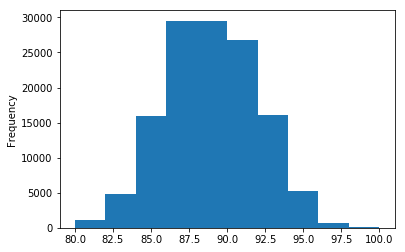

In [89]:
reviews['points'].plot.hist()

**Exercise 1**: What is the median of the `points` column?

In [90]:
median_val = reviews['points'].median()
print (check_q1(median_val), '\n', median_val)

True 
 88.0


**Exercise 2**: What countries are represented in the dataset?

In [91]:
country_list = reviews['country'].unique()
print (check_q2(country_list), '\n', country_list)

True 
 ['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt']


**Exercise 3**: What countries appear in the dataset most often?

In [92]:
country_count = reviews['country'].value_counts()
print (check_q3(country_count), '\n', country_count)

True 
 US        54504
France    22093
          ...  
China         1
Egypt         1
Name: country, Length: 43, dtype: int64


**Exercise 4**: Remap the `price` column by subtracting the median price.

In [93]:
median_price = reviews['price'].median()
new_price = reviews['price'].map(lambda x: x - median_price)
print (check_q4(new_price), '\n', new_price)

True 
 0          NaN
1        -10.0
          ... 
129969     7.0
129970    -4.0
Name: price, Length: 129971, dtype: float64


**Exercise 5**: I"m an economical wine buyer. What is the name (`title`) of the "best bargain" wine, e.g., the one which has the highest points-to-price ratio in the dataset?

Hint: use a map and the [`idxmax` function](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.Series.idxmax.html).

In [94]:
ratio_list = reviews['points']/reviews['price']
best_wine_title = reviews['title'].loc[ratio_list.argmax()]
print (check_q5(best_wine_title), '\n', best_wine_title)

True 
 Bandit NV Merlot (California)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  
../input/advanced-pandas-exercises/summary_functions_maps.py:44: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  expected = reviews.loc[(reviews.points / reviews.price).argmax()].title


Now it's time for some visual exercises.

**Exercise 6**: There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a `Series` counting how many times each of these two words appears in the `description` column in the dataset.

Hint: use a map to check each description for the string `tropical`, then count up the number of times this is `True`. Repeat this for `fruity`. Create a `Series` combining the two values at the end.

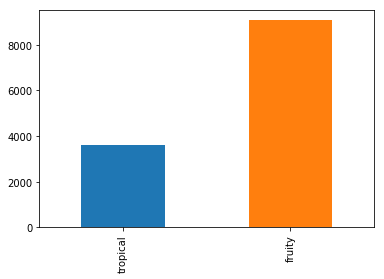

In [ ]:
#temp = reviews['description'].loc[reviews['description'].isin(['tropical', 'fruity'])]
count_tropical = reviews['description'].loc[reviews['description'].map(lambda x: 'tropical' in x)].count()
count_fruity = reviews['description'].loc[reviews['description'].map(lambda x: 'fruity' in x)].count()
count_series = pd.Series([count_tropical, count_fruity], index=['tropical', 'fruity'])
check_q6(count_series)

**Exercise 7**: What combination of countries and varieties are most common?

Create a `Series` whose index consists of strings of the form `"<Country> - <Wine Variety>"`. For example, a pinot noir produced in the US should map to `"US - Pinot Noir"`. The values should be counts of how many times the given wine appears in the dataset. Drop any reviews with incomplete `country` or `variety` data.

Note that some of the `Country` and `Wine Variety` values are missing data. We will learn more about missing data in a future section of the tutorial. For now you may use the included code snippet to normalize these columns.

Hint:  Use a map to create a series whose entries are a `str` concatenation of those two columns. Then, generate a `Series` counting how many times each label appears in the dataset.

In [ ]:
clean_data = reviews.loc[reviews['country'].notna() & reviews['variety'].notna()]
check_q7(clean_data.apply(lambda x : str(x['country'])+' - '+str(x['variety']), axis ='columns').value_counts())

# Keep going
**[Continue to grouping and sorting](https://www.kaggle.com/residentmario/grouping-and-sorting-workbook).**